# 1. Exploración de datos

## 1.1 Carga de datos

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import sys;
sys.path.append("../");
from app.utils.funciones import mostrar_titulo, colores

In [ ]:
#carga de datos
ruta_csv = "../datos/datos_iniciales.csv"

df = pd.read_csv(ruta_csv, encoding='latin1', sep=";")

# mostrar las primeras filas
mostrar_titulo("Primeras filas del dataset")
df.head()

In [4]:
# mostrar la cantidad de registros en el archivo
mostrar_titulo(f"Cantidad de registros: {df.shape[0]}.  Cantidad de columnas: {df.shape[1]}")

🔶 Cantidad de registros: 1788.  Cantidad de columnas: 20


## 1.2 Eliminar los registros con poca o sin información
Este trabajo se basa en el análisis de texto, por lo tanto es importante contar con registros que contengan la sección "Resumen" del TF o se pueda acceder al archivo pdf (campo "pdf")

In [5]:
# eliminar registros con resumen vacío o no contiene link para descargar el pdf
df=df[ (df['resumen'].notna() & (df['resumen'] != '')) | (df['pdf'].notna() & (df['pdf'] != '')) ]

# Cantidad de registros/columnas después de eliminar lo anterior
mostrar_titulo(f"Cantidad de registros: {df.shape[0]}.  Cantidad de columnas: {df.shape[1]}")
#df.shape

🔶 Cantidad de registros: 1274.  Cantidad de columnas: 20


In [6]:
# agrupar por carrera y 'titulo'. Contar ocurrencias para determinar si hay repetidos
df_agrupado = df.groupby(['carrera', 'titulo']).size().reset_index(name='count')

# Filtrar los registros que se repiten más de una vez
df_repetidos = df_agrupado[df_agrupado['count'] > 1]

df_repetidos

,carrera,titulo,count
0,Ingeniería Civil,Alternativa conexión autopista Circunvalación ...,2
2,Ingeniería Civil,Análisis de los requerimientos de la norma IC1...,2
7,Ingeniería Civil,Carretera Embarcación-Orán,2
14,Ingeniería Civil,"Diseño de traza, cálculo y dimensionamiento de...",2
21,Ingeniería Civil,Estéreo-estructura para cubierta de pileta de ...,2
123,Ingeniería Industrial,Proyecto de inversión de una planta deshidrata...,2
432,Licenciatura en Comunicaciones Sociales,Plan de comunicación para el relanzamiento de ...,2
646,Licenciatura en Imagen y Sonido,Capítulo 1. El último suspiro,2
647,Licenciatura en Imagen y Sonido,Capítulo 2. El último suspiro,2
995,Licenciatura en Recursos Humanos,Memoria de Práctica Profesional,3


Después de revisar el listado anterior se determina que existen registros duplicados con información incompleta
por lo tanto se eliminan los registros repetidos con menor cantidad de información

In [8]:
# Filas repetidas con vistas_txt=0
a_eliminar = df_lista_repetidos[df_lista_repetidos['vistas_txt'] == '0']

# Eliminar de df esas filas
df = df[~df['id'].isin(a_eliminar['id'])]

Los registros repetidos (10) fueron eliminados

In [9]:
# Cantidad de registros/columnas después de eliminar lo anterior
mostrar_titulo(f"Cantidad de registros: {df.shape[0]}.  Cantidad de columnas: {df.shape[1]}")

🔶 Cantidad de registros: 1264.  Cantidad de columnas: 20


In [10]:
# Verificar que no quedan registros duplicados
# agrupar por carrera y 'titulo'. Contar ocurrencias para determinar si hay repetidos
df_agrupado = df.groupby(['carrera', 'titulo']).size().reset_index(name='count')

# Filter for groups that appear more than once
df_repetidos = df_agrupado[df_agrupado['count'] > 1]

df_repetidos

,carrera,titulo,count
123,Ingeniería Industrial,Proyecto de inversión de una planta deshidrata...,2
995,Licenciatura en Recursos Humanos,Memoria de Práctica Profesional,3


Aunque en la tabla anterior se muestra que aún existen registros, se verificó que corresponden a TFG con el mismo titulo pero pertenecen a distintos tesistas, por lo tanto, no se los elimina

In [11]:
#Seleccionar datos para este proyecto. Descartar datos sensibles (nombres de autores y docentes) y datos redundantes
df=df[['id','anio', 'titulo','descargas','vistas','google_scholar', 'tipo_tesis','carrera','facultad','url','pdf','resumen']]

In [12]:
# mostrar la cantidad de registros 
mostrar_titulo(f"Cantidad de registros: {df.shape[0]}.  Cantidad de columnas: {df.shape[1]}")

🔶 Cantidad de registros: 1264.  Cantidad de columnas: 12


### 1.3 Análisis exploratorio de los datos
Se incluen estadísticas de facultades, carreras, vistas y descargas de los TFG.

In [13]:
# df_group_fac_carr=df.groupby(['facultad','carrera']).size().reset_index(name='cantidad').sort_values(by='cantidad', ascending=False)

# df_group_fac_carr

### Estadísticas por Facultades

In [14]:
# df_group_fac = df.groupby(['facultad']).size().reset_index(name='cantidad').sort_values(by='cantidad', ascending=False)

# df_group_fac

In [16]:
# Calcular frecuencias
facultad_counts = df['facultad'].value_counts()
facultad_rel = df['facultad'].value_counts(normalize=True) * 100

# Crear DataFrame 
facultad_df = pd.DataFrame({
    'Facultad': facultad_counts.index,
    'Frecuencia Absoluta': facultad_counts.values,
    'Frecuencia Relativa (%)': facultad_rel.values.round(1)
})

# Mostrar tabla - FRECUENCIA POR FACULTADES 
mostrar_titulo("Frecuencia de TFG por FACULTADES")
facultad_df

🔶 Frecuencia de TFG por FACULTADES


,Facultad,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Artes y Ciencias,404,32.0
1,Economía y Administración,319,25.2
2,Ingeniería,269,21.3
3,Escuela de Educación Física,88,7.0
4,Trabajo Social,73,5.8
5,Ciencias Jurídicas,59,4.7
6,Turismo,33,2.6
7,Educación,8,0.6
8,Ciencias de la Salud,7,0.6
9,Música,3,0.2


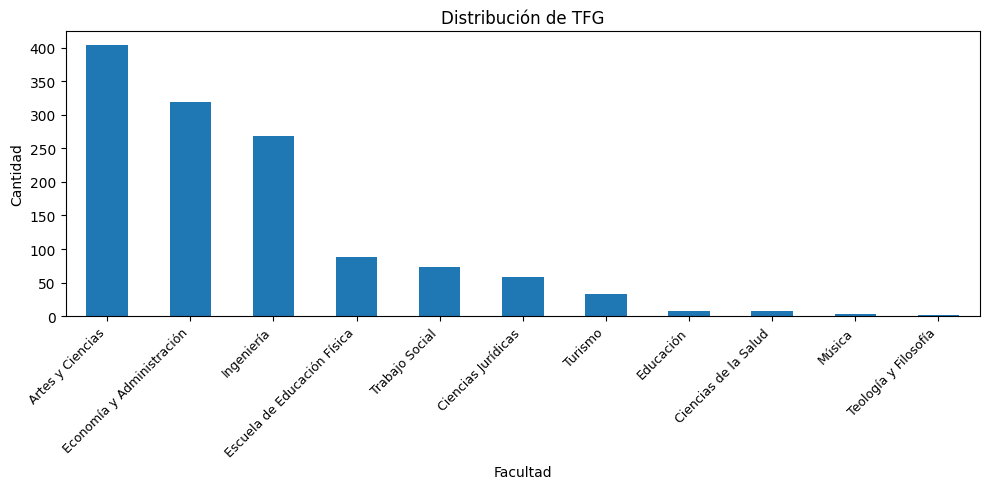

In [17]:
# Gráfico de facultades
plt.figure(figsize=(10, 5))
facultad_counts.plot(kind='bar')
plt.title('Distribución de TFG')
plt.xlabel('Facultad', fontsize= 10)
plt.ylabel('Cantidad', fontsize= 10)
plt.xticks(rotation=45, ha='right',fontsize= 9)
plt.tight_layout()
plt.show()

### Estadísticas por carreras

In [18]:
# df_group_carr = df.groupby(['carrera']).size().reset_index(name='cantidad').sort_values(by='cantidad', ascending=False)

# df_group_carr

In [19]:
# Frecuencias por carrera 
carrera_counts = df['carrera'].value_counts()
carrera_rel = df['carrera'].value_counts(normalize=True) * 100

# Crear DataFrame para la tabla
carrera_df = pd.DataFrame({
    'Carrera': carrera_counts.index,
    'Frecuencia Absoluta': carrera_counts.values,
    'Frecuencia Relativa (%)': carrera_rel.values.round(1)
})
# Mostrar FRECUENCIAS por CARRERAS
mostrar_titulo("Frecuencia de TFG por CARRERAS")
carrera_df

🔶 Frecuencia de TFG por CARRERAS


,Carrera,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Licenciatura en Psicología,204,16.1
1,Licenciatura en Recursos Humanos,110,8.7
2,Licenciatura en Comunicaciones Sociales,103,8.1
3,Ingeniería Industrial,89,7.0
4,Licenciatura en Educación Física,83,6.6
5,Licenciatura en Trabajo Social,73,5.8
6,Licenciatura en Relaciones Internacionales,65,5.1
7,Ingeniería en Informática,59,4.7
8,Licenciatura en Higiene y Seguridad en el Trabajo,54,4.3
9,Licenciatura en Administración de Empresas,52,4.1


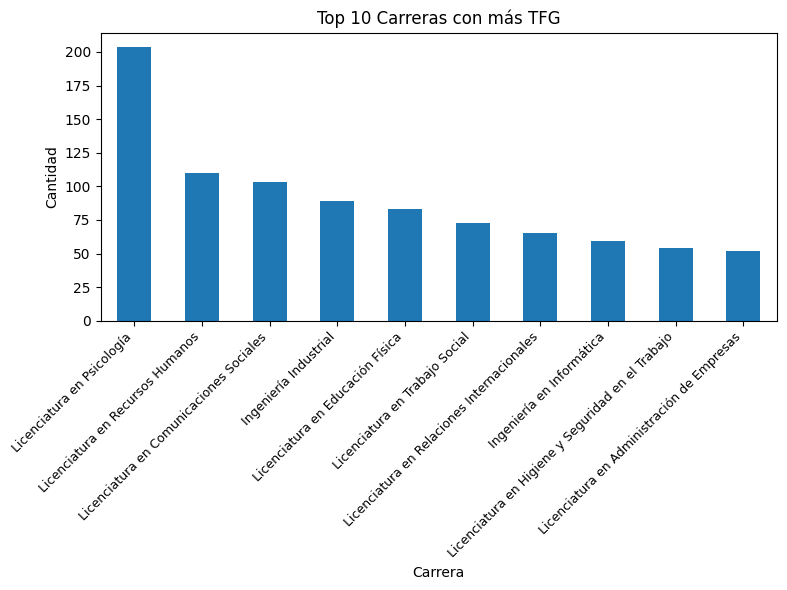

In [20]:
# Gráfico de carreras (top 10). Para facilitar la lectura se restringe a las 10 con mayor frecuencia
plt.figure(figsize=(8, 6))
df['carrera'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Carreras con más TFG')
plt.xlabel('Carrera', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.xticks(rotation=45, ha='right',fontsize= 9)
plt.tight_layout()
plt.show()

### Tendencias temporales

In [21]:
# Recuento anual de publicaciones
anio_counts = df['anio'].value_counts().sort_index()

mostrar_titulo("Publicaciones por año:")
anio_counts


🔶 Publicaciones por año:


anio
2015     15
2016     72
2017    110
2018    160
2019    268
2020    136
2021    131
2022    127
2023    122
2024    123
Name: count, dtype: int64

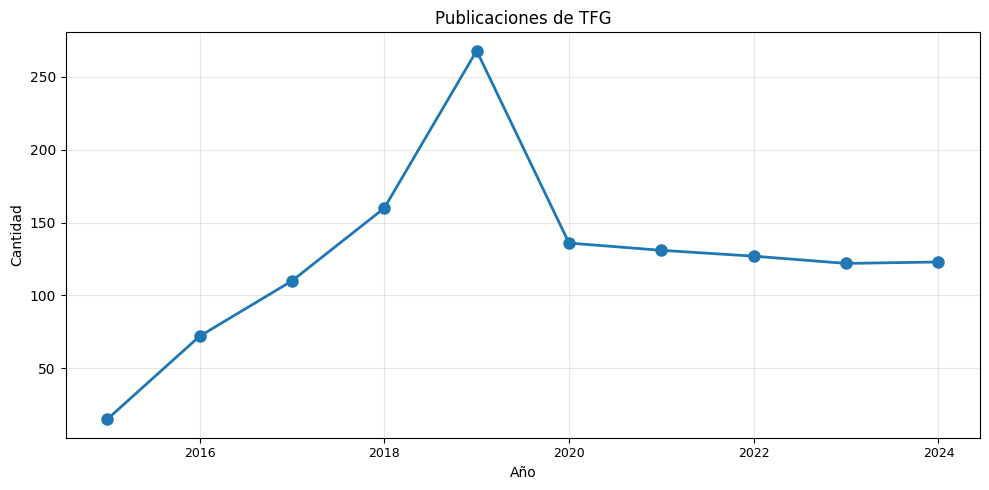

In [22]:
# Gráfico de tendencia temporal
plt.figure(figsize=(10, 5))
anio_counts.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Publicaciones de TFG')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True, alpha=0.3)
plt.xticks(fontsize= 9)
plt.tight_layout()
plt.show()

### Estadísticas de vistas y descargas

In [24]:
# Estadísticas descriptivas para vistas
vistas_stats = {
    'Media': df['vistas'].mean(),
    'Mediana': df['vistas'].median(),
    'Mínimo': df['vistas'].min(),
    'Máximo': df['vistas'].max(),
    'Desviación Estándar': df['vistas'].std(),
    'Total': df['vistas'].sum()
}

# Estadísticas descriptivas para descargas
descargas_stats = {
    'Media': df['descargas'].mean(),
    'Mediana': df['descargas'].median(),
    'Mínimo': df['descargas'].min(),
    'Máximo': df['descargas'].max(),
    'Desviación Estándar': df['descargas'].std(),
    'Total': df['descargas'].sum()
}

# Crear DataFrame comparativo
stats_comparativo = pd.DataFrame({
    'Métrica': list(vistas_stats.keys()),
    'Vistas': [vistas_stats[metric] for metric in vistas_stats.keys()],
    'Descargas': [descargas_stats[metric] for metric in descargas_stats.keys()]
})

stats_comparativo['Vistas'] = stats_comparativo['Vistas'].apply(lambda x: round(x,2))
stats_comparativo['Descargas'] = stats_comparativo['Descargas'].apply(lambda x: round(x,2))

# Mostrar tabla formateada
mostrar_titulo("TABLA COMPARATIVA DE ESTADÍSTICAS DESCRIPTIVAS:")
stats_comparativo

🔶 TABLA COMPARATIVA DE ESTADÍSTICAS DESCRIPTIVAS:


,Métrica,Vistas,Descargas
0,Media,90.66,143.43
1,Mediana,70.00,101.00
2,Mínimo,0.00,0.00
3,Máximo,1736.00,2148.00
4,Desviación Estándar,102.52,171.19
5,Total,114598.00,181294.00


### Evolución por años

In [25]:
# Agrupar por año y calcular suma de vistas y descargas
anio_stats = df.groupby('anio').agg({
    'vistas': 'sum',
    'descargas': 'sum',
    'id': 'count'  # Para contar el número de tesis por año
}).rename(columns={'id': 'cantidad_TFG'})

mostrar_titulo("Datos agrupados por año:")
anio_stats

🔶 Datos agrupados por año:


,vistas,descargas,cantidad_TFG
anio,,,
2015,2193,4371,15
2016,5367,11718,72
2017,13704,30853,110
2018,16169,20789,160
2019,28200,42071,268
2020,11401,16499,136
2021,13043,18300,131
2022,9574,13625,127
2023,9350,14502,122


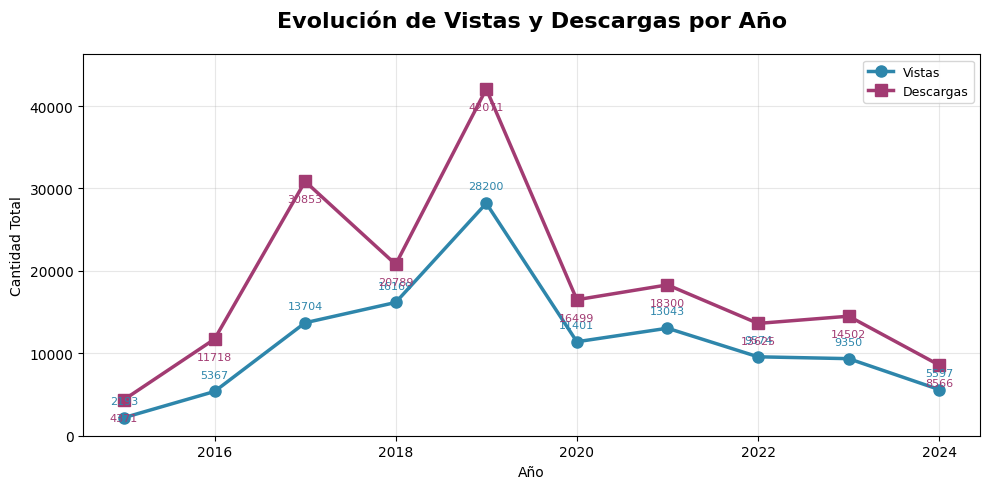

In [26]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 5))

# Graficar las dos líneas
plt.plot(anio_stats.index, anio_stats['vistas'], marker='o', linewidth=2.5, markersize=8, label='Vistas', color='#2E86AB')
plt.plot(anio_stats.index, anio_stats['descargas'], marker='s', linewidth=2.5, markersize=8, label='Descargas', color='#A23B72')

# Personalizar el gráfico
plt.title('Evolución de Vistas y Descargas por Año', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad Total', fontsize=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Añadir valores en los puntos
for año in anio_stats.index:
    plt.annotate(f"{anio_stats.loc[año, 'vistas']:.0f}", 
                (año, anio_stats.loc[año, 'vistas']), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center', 
                fontsize=8,
                color='#2E86AB')
    
    plt.annotate(f"{anio_stats.loc[año, 'descargas']:.0f}", 
                (año, anio_stats.loc[año, 'descargas']), 
                textcoords="offset points", 
                xytext=(0,-15), 
                ha='center', 
                fontsize=8,
                color='#A23B72')

# Ajustar límites del eje Y para mejor visualización
margin = max(anio_stats[['vistas', 'descargas']].max().max() * 0.1, 50)
plt.ylim(0, max(anio_stats[['vistas', 'descargas']].max().max() + margin, 100))

plt.tight_layout()
plt.show()


### Análisis adicional
Mostrar los TFG con mayor cantidad de vistas y descargas (indicaría interés en la temática del trabajo)

In [27]:
# Top 10 tesis más vistas
top_vistas = df.nlargest(10, 'vistas')[['titulo', 'vistas', 'descargas', 'anio', 'facultad','carrera']]
mostrar_titulo("Top 10 tesis más vistas:")
top_vistas
# for idx, row in top_vistas.iterrows():
#     print(f"  {row['titulo'][:50]}... - {row['vistas']} vistas")

🔶 Top 10 tesis más vistas:


,titulo,vistas,descargas,anio,facultad,carrera
454,Políticas sociales y trabajo social,1736,1786,2018,Trabajo Social,Licenciatura en Trabajo Social
179,El ahorcamiento en la práctica forense,1462,2148,2017,Ciencias Jurídicas,Licenciatura en Criminalística
797,Gestión de talento humano y desempeño laboral,790,1079,2019,Economía y Administración,Licenciatura en Administración de Empresas
80,La función directiva de una organización escolar,744,1888,2015,Educación,Licenciatura en Gestión Educativa
77,"Contaminación de la Escena del Crimen, el Talo...",742,1121,2015,Ciencias Jurídicas,Licenciatura en Criminalística
1077,Gestión educativa y configuraciones de apoyo,586,838,2021,Educación,Licenciatura en Gestión Educativa
18,Análisis de factibilidad para planta de extrac...,501,1041,2016,Ingeniería,Ingeniería Industrial
461,Estrategias de prevención para abordar la moda...,494,700,2018,Ciencias Jurídicas,Licenciatura en Seguridad
801,Guerra Comercial entre los Estados Unidos y China,479,273,2019,Economía y Administración,Licenciatura en Comercio Internacional
1128,La actitud de los jóvenes frente al consumo de...,479,769,2020,Artes y Ciencias,Licenciatura en Psicología


In [28]:
# Top 10 tesis más descargadas
top_descargas = df.nlargest(10, 'descargas')[['titulo', 'descargas', 'vistas', 'anio', 'facultad','carrera']]
mostrar_titulo("Top 10 TFG más descargados")

top_descargas

🔶 Top 10 TFG más descargados


,titulo,descargas,vistas,anio,facultad,carrera
179,El ahorcamiento en la práctica forense,2148,1462,2017,Ciencias Jurídicas,Licenciatura en Criminalística
80,La función directiva de una organización escolar,1888,744,2015,Educación,Licenciatura en Gestión Educativa
454,Políticas sociales y trabajo social,1786,1736,2018,Trabajo Social,Licenciatura en Trabajo Social
163,Representaciones sociales sobre el abordaje in...,1502,441,2017,Artes y Ciencias,Licenciatura en Psicología
77,"Contaminación de la Escena del Crimen, el Talo...",1121,742,2015,Ciencias Jurídicas,Licenciatura en Criminalística
797,Gestión de talento humano y desempeño laboral,1079,790,2019,Economía y Administración,Licenciatura en Administración de Empresas
18,Análisis de factibilidad para planta de extrac...,1041,501,2016,Ingeniería,Ingeniería Industrial
165,Plenitud existencial de los profesionales psic...,901,182,2017,Artes y Ciencias,Licenciatura en Psicología
159,Adaptación del cuestionario autoreportado de p...,879,183,2017,Artes y Ciencias,Licenciatura en Psicología
221,Identidad y campaña gráfica del circuito de la...,879,264,2017,Artes y Ciencias,Licenciatura en Diseño Gráfico


In [29]:
# Resumen final
mostrar_titulo("RESUMEN")
print(f"• Total de tesis analizadas: {len(df)}")
print(f"• Período cubierto: {df['anio'].min()} - {df['anio'].max()}")
print(f"• Facultad con más publicaciones: {facultad_counts.index[0]} ({facultad_counts.iloc[0]} tesis)")
print(f"• Carrera con más publicaciones: {carrera_counts.index[0]} ({carrera_counts.iloc[0]} tesis)")
print(f"• Año con más publicaciones: {anio_counts.idxmax()} ({anio_counts.max()} tesis)")
print(f"• TFG más visto: {top_vistas.iloc[0]['titulo'], top_vistas.iloc[0]['carrera'], top_vistas.iloc[0]['facultad']}... ({top_vistas.iloc[0]['vistas']} vistas)")
print(f"• TFG más descargado: {top_descargas.iloc[0]['titulo'], top_descargas.iloc[0]['carrera'], top_descargas.iloc[0]['facultad']}... ({top_descargas.iloc[0]['descargas']} descargas)")


🔶 RESUMEN
• Total de tesis analizadas: 1264
• Período cubierto: 2015 - 2024
• Facultad con más publicaciones: Artes y Ciencias (404 tesis)
• Carrera con más publicaciones: Licenciatura en Psicología (204 tesis)
• Año con más publicaciones: 2019 (268 tesis)
• TFG más visto: ('Políticas sociales y trabajo social', 'Licenciatura en Trabajo Social', 'Trabajo Social')... (1736 vistas)
• TFG más descargado: ('El ahorcamiento en la práctica forense', 'Licenciatura en Criminalística', 'Ciencias Jurídicas')... (2148 descargas)


### 1.4 Seleccionar las carreras para encontrar tópicos
Se selccionan las 3 carreras con mayor cantidad de TFG

In [40]:
df_group_carr = df.groupby(['carrera']).size().reset_index(name='cantidad').sort_values(by='cantidad', ascending=False)
top_carreras = df_group_carr.head(3) #df_group_carr.index.get_level_values('carrera').tolist()
top_carreras

,carrera,cantidad
23,Licenciatura en Psicología,204
25,Licenciatura en Recursos Humanos,110
10,Licenciatura en Comunicaciones Sociales,103


In [ ]:
# Filtrar los registros de las carreras elegidas
df_carr_sel = df[df['carrera'].isin(top_carreras['carrera'])]

df_carr_sel.head()

In [31]:
# registros que se usarán en la etapa siguiente

mostrar_titulo(f' Registros que se usarán en la etapa siguiente: {df_carr_sel.shape[0]}')

🔶  Registros que se usarán en la etapa siguiente: 417


In [32]:
df_group_sel = df_carr_sel.groupby(['carrera']).size().reset_index(name='cantidad').sort_values(by='cantidad', ascending=False)
mostrar_titulo('CARRERAS SELECCIONADAS PARA EL MODELADO DE TOPICOS:')

df_group_sel

🔶 CARRERAS SELECCIONADAS PARA EL MODELADO DE TOPICOS:


,carrera,cantidad
1,Licenciatura en Psicología,204
2,Licenciatura en Recursos Humanos,110
0,Licenciatura en Comunicaciones Sociales,103


### Análisis estadístico de las carreras seleccionadas

In [33]:
# Contar publicaciones por año para cada carrera
evolucion_carr_sel = df_carr_sel.groupby(['anio', 'carrera']).size().unstack(fill_value=0)

mostrar_titulo("Evolución temporal de las top 3 carreras")
evolucion_carr_sel

🔶 Evolución temporal de las top 3 carreras


carrera,Licenciatura en Comunicaciones Sociales,Licenciatura en Psicología,Licenciatura en Recursos Humanos
anio,,,
2015,0,5,1
2016,10,8,4
2017,7,7,6
2018,12,38,3
2019,29,18,30
2020,8,25,15
2021,9,23,25
2022,9,26,5
2023,9,44,16


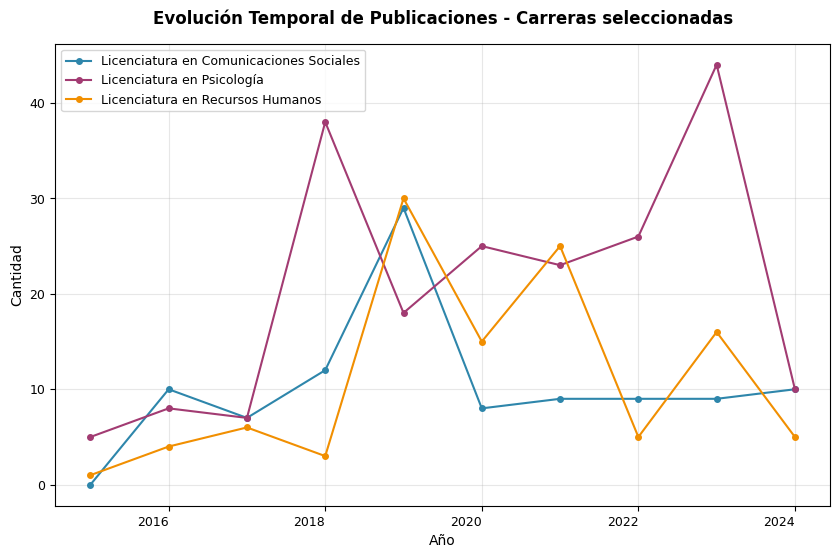

In [34]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Definir colores para cada carrera
#colores = ['#2E86AB', '#A23B72', '#F18F01']

# Graficar cada carrera
for i, carrera in enumerate(evolucion_carr_sel):
    if carrera in evolucion_carr_sel.columns:
        plt.plot(evolucion_carr_sel.index, evolucion_carr_sel[carrera], 
                marker='o', linewidth=1.5, markersize=4, 
                label=carrera, color=colores[i])

# Personalizar el gráfico
plt.title('Evolución Temporal de Publicaciones - Carreras seleccionadas', 
          fontsize=12, fontweight='bold', pad=14)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.legend(fontsize=9, loc='best')
plt.xticks(ha='right',fontsize= 9)
plt.yticks(ha='right',fontsize= 9)
plt.grid(True, alpha=0.3)


### Vistas y descargas

In [35]:
# Agrupar por año y calcular suma de vistas y descargas
anio_vd = df_carr_sel.groupby('anio').agg({
    'vistas': 'sum',
    'descargas': 'sum',
    'id': 'count'  # Para contar el número de tesis por año
}).rename(columns={'id': 'cantidad_TFG'})

mostrar_titulo("Datos agrupados por año:")
anio_vd

Datos agrupados por año:


,vistas,descargas,cantidad_TFG
anio,,,
2015,84,393,6
2016,1734,4446,22
2017,2793,7996,20
2018,4966,7241,53
2019,7523,11558,77
2020,4976,7361,48
2021,6548,9196,57
2022,3077,4231,40
2023,5304,8332,69


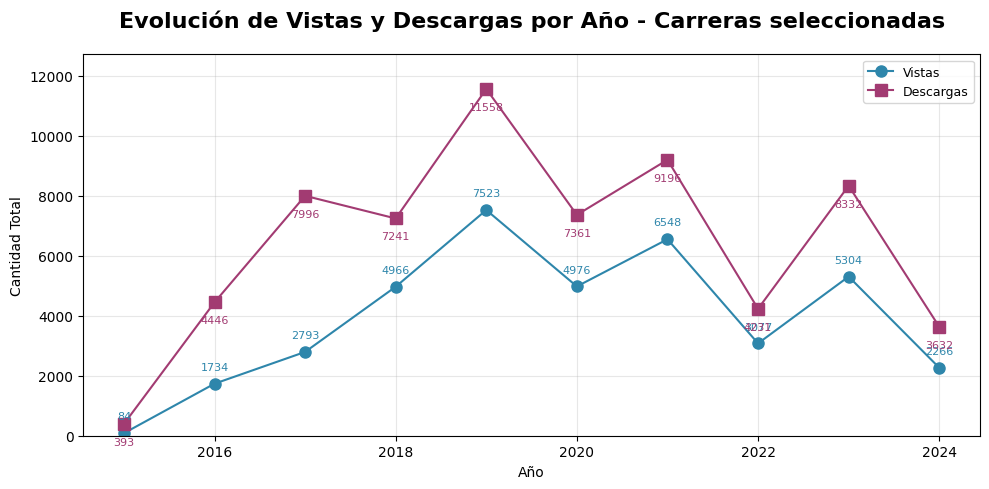

In [39]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 5))

# Graficar dos líneas
plt.plot(anio_vd.index, anio_vd['vistas'], marker='o', linewidth=1.5, markersize=8, label='Vistas', color='#2E86AB')
plt.plot(anio_vd.index, anio_vd['descargas'], marker='s', linewidth=1.5, markersize=8, label='Descargas', color='#A23B72')

# Personalizar el gráfico
plt.title('Evolución de Vistas y Descargas por Año - Carreras seleccionadas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad Total', fontsize=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Añadir valores en los puntos
for año in anio_stats.index:
    plt.annotate(f"{anio_vd.loc[año, 'vistas']:.0f}", 
                (año, anio_vd.loc[año, 'vistas']), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center', 
                fontsize=8,
                color='#2E86AB')
    
    plt.annotate(f"{anio_vd.loc[año, 'descargas']:.0f}", 
                (año, anio_vd.loc[año, 'descargas']), 
                textcoords="offset points", 
                xytext=(0,-15), 
                ha='center', 
                fontsize=8,
                color='#A23B72')

# Ajustar límites del eje Y para mejor visualización
margin = max(anio_vd[['vistas', 'descargas']].max().max() * 0.1, 50)
plt.ylim(0, max(anio_vd[['vistas', 'descargas']].max().max() + margin, 100))

plt.tight_layout()
plt.show()


### 1.6 Guardar datos en archivos

In [37]:
# Guardar en archivo los datos seleccionados para el paso siguiente 
df_carr_sel.to_csv('..\datos\datos_carr_sel.csv', index=False, encoding='latin1', sep=';')

In [38]:
# Guardar en archivo los datos filtrados para mostrar en dashboard
df.to_csv('..\datos\datos_seleccionados.csv', index=False, encoding='latin1', sep=';')